In [29]:
import pandas as pd
df = pd.read_csv('loan_status_new_rf.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.drop('Loan_ID', axis=1, inplace=True)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
col_to_be_encoded = ['Gender', 'Married','Education','Self_Employed','Property_Area','Dependents','Loan_Status']
for col in col_to_be_encoded:
    df[col] = le.fit_transform(df[col])

In [6]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.Credit_History.fillna(1, inplace=True)
df.Loan_Amount_Term.fillna(360, inplace=True)
df.dropna(inplace=True)

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
test_pred = dtree.predict(X_test)
test_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.48      0.67      0.56        72
           1       0.82      0.68      0.75       165

    accuracy                           0.68       237
   macro avg       0.65      0.68      0.65       237
weighted avg       0.72      0.68      0.69       237



In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [16]:
rfc_test_pred = rfc.predict(X_test)

In [17]:
print(classification_report(y_test, rfc_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.46      0.60        72
           1       0.80      0.97      0.88       165

    accuracy                           0.81       237
   macro avg       0.84      0.71      0.74       237
weighted avg       0.82      0.81      0.79       237



In [18]:
rfc.feature_importances_

array([0.0189652 , 0.0403641 , 0.0291374 , 0.0267554 , 0.01514165,
       0.11441959, 0.09322981, 0.12290726, 0.0526108 , 0.4351697 ,
       0.05129908])

[Text(0, 0, 'Gender'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Dependents'),
 Text(3, 0, 'Education'),
 Text(4, 0, 'Self_Employed'),
 Text(5, 0, 'ApplicantIncome'),
 Text(6, 0, 'CoapplicantIncome'),
 Text(7, 0, 'LoanAmount'),
 Text(8, 0, 'Loan_Amount_Term'),
 Text(9, 0, 'Credit_History'),
 Text(10, 0, 'Property_Area')]

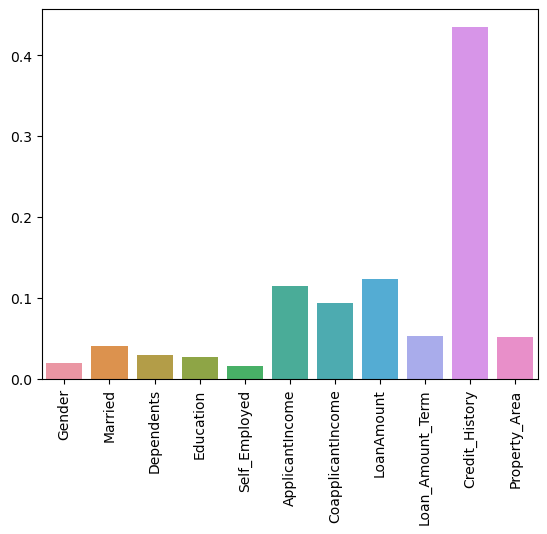

In [21]:
import seaborn as sns
g = sns.barplot(X.columns, rfc.feature_importances_)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [24]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
df.drop(columns=['Loan_ID'], inplace=True)

In [31]:
from sklearn import preprocessing
col_to_be_encoded = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area', 'Loan_Status']
le = preprocessing.LabelEncoder()
for col in col_to_be_encoded:
    df[col] = le.fit_transform(df[col])
    print(le.classes_)
df

['Female' 'Male' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['Graduate' 'Not Graduate']
['No' 'Yes' nan]
['Rural' 'Semiurban' 'Urban']
['N' 'Y']


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [44]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [43]:
df.Credit_History.fillna(1, inplace=True)
df.Loan_Amount_Term.fillna(360, inplace=True)
df.dropna(subset=['LoanAmount'],inplace=True)

In [45]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [58]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Loan_Status'],axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
pred = dtree.predict(X_test)
pred

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0])

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.43      0.53      0.47        34
           1       0.79      0.72      0.75        85

    accuracy                           0.66       119
   macro avg       0.61      0.62      0.61       119
weighted avg       0.69      0.66      0.67       119



In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [71]:
rfc_pred = rfc.predict(X_test)

In [72]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59        34
           1       0.81      0.98      0.89        85

    accuracy                           0.82       119
   macro avg       0.85      0.71      0.74       119
weighted avg       0.83      0.82      0.80       119



In [73]:
rfc_pred_train = rfc.predict(X_train)
print(classification_report(y_train, rfc_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.47      0.63       147
           1       0.81      0.99      0.89       326

    accuracy                           0.83       473
   macro avg       0.88      0.73      0.76       473
weighted avg       0.85      0.83      0.81       473



In [74]:
rfc.feature_importances_

array([0.01479381, 0.01919234, 0.02805183, 0.01428808, 0.01067659,
       0.10405467, 0.07899302, 0.11285824, 0.04269421, 0.54783052,
       0.02656669])

[Text(0, 0, 'Gender'),
 Text(1, 0, 'Married'),
 Text(2, 0, 'Dependents'),
 Text(3, 0, 'Education'),
 Text(4, 0, 'Self_Employed'),
 Text(5, 0, 'ApplicantIncome'),
 Text(6, 0, 'CoapplicantIncome'),
 Text(7, 0, 'LoanAmount'),
 Text(8, 0, 'Loan_Amount_Term'),
 Text(9, 0, 'Credit_History'),
 Text(10, 0, 'Property_Area')]

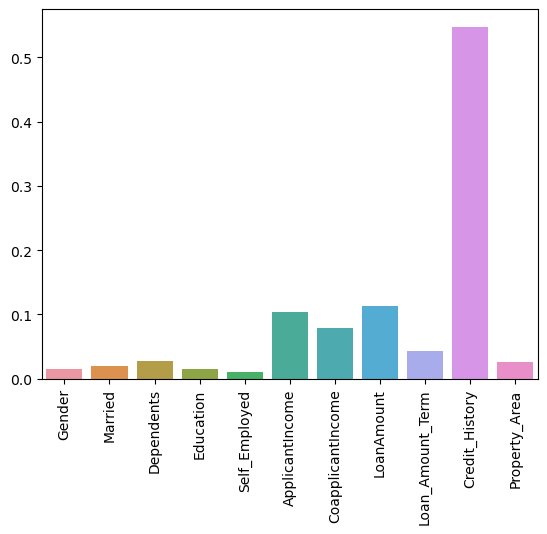

In [80]:
import seaborn as sns
g=sns.barplot(X.columns, rfc.feature_importances_)
g.set_xticklabels(g.get_xticklabels(), rotation=90)